<a href="https://colab.research.google.com/github/inhamjchoi/SafetyDataClass/blob/main/Ex03_2_Classification_HeartData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Load data
df = pd.read_csv('Ex03_2_heartData.csv')
#df = pd.read_csv('Ex03_2_heartData(Categorical).csv')
#df = pd.read_csv('Ex03_2_heartData(Multi).csv')

In [ ]:
df.head()

,Age,Cholesterol,ExerciseDuration,METs,RestingHeartRate,RestingSystolic,RestingDiastolic,MaxHeartRate,PeakExSystolic,PeakExDiastolic,InducedSTDep,HeartDisease
0,0.708333,0.371508,0.486486,0.6875,0.253165,0.490741,0.583333,0.609023,0.679487,0.615385,0.410714,False
1,0.791667,0.519553,0.432432,0.6875,0.303797,0.629630,0.666667,0.293233,0.487179,0.615385,0.267857,True
2,0.791667,0.360335,0.378378,0.5000,0.481013,0.259259,0.500000,0.451128,0.358974,0.519231,0.464286,True
3,0.166667,0.418994,0.621622,0.9375,0.556962,0.351852,0.466667,0.887218,0.711538,0.403846,0.625000,False
4,0.250000,0.290503,0.297297,0.4375,0.392405,0.351852,0.600000,0.774436,0.487179,0.461538,0.250000,False


In [ ]:
# Features and target
X = df.drop(columns=['HeartDisease'])   # input features
y = df['HeartDisease']                  # target label

In [ ]:
# Split into training and test sets (70% train / 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

print(f"{len(df)} original observations split into:")
print(f" + {len(X_train)} training observations")
print(f" + {len(X_test)} test observations")

427 original observations split into:
 + 298 training observations
 + 129 test observations


In [ ]:
# Train k-NN classifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Test Various Models
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC, LinearSVC
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier

# model_knn = KNeighborsClassifier(n_neighbors=5)
# model_dt = DecisionTreeClassifier(random_state=42)
# model_svc_linear = SVC(kernel='linear', probability=True, random_state=42)
# model_svc_rbf = SVC(kernel='rbf', probability=True, random_state=42)
# model_linear_svc = LinearSVC(random_state=42, max_iter=10000)
# model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
# model_gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
# model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# model_lgbm = LGBMClassifier(random_state=42)

In [ ]:
# Evaluate training and test error
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
errTrain = 1 - train_accuracy
errTest = 1 - test_accuracy

In [ ]:
print(f"Training Error: {errTrain:.4f}")
print(f"Test Error: {errTest:.4f}")

Training Error: 0.1946
Test Error: 0.3256


In [ ]:
# Calculate False Negatives (from Confusion Matrix)

In [ ]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=model.classes_, normalize='true')

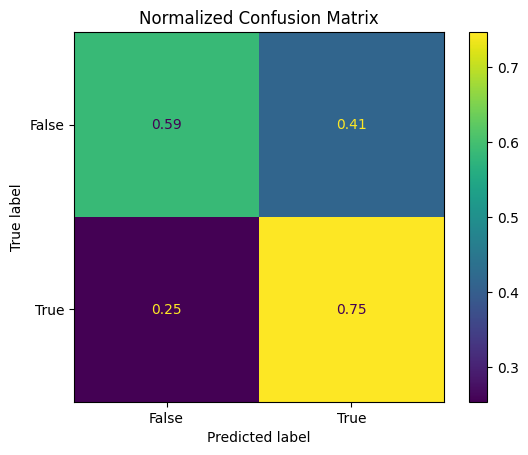

In [ ]:
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
disp.ax_.set_title("Normalized Confusion Matrix")
import matplotlib.pyplot as plt
plt.show()

In [ ]:
# False Negative Rate (row: actual=1, col: predicted=0)
false_negative_rate = cm[1, 0]  # normalized value: P(actual 1, predicted 0)
percentFN = false_negative_rate * 100

print(f"Percentage of False Negatives: {percentFN:.2f}%")

Percentage of False Negatives: 25.35%
